# **Price Trackers ✨**
#Margo Tiamanova
#Florencia Ogorinsky
***Price Comparison Tool for Airbnb***

# **Data cleaning and preprocessing**

In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("arianazmoudeh/airbnbopendata")

print("Path to dataset files:", path)

csv_file = None
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file = os.path.join(path, filename)
        break

data = pd.read_csv(csv_file)

data.info()

100%|██████████| 10.5M/10.5M [00:00<00:00, 42.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arianazmoudeh/airbnbopendata/versions/1


<ipython-input-1-db87864a0698>:15: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
# Take a 5% sample of the data
data = data.sample(frac=0.05, random_state=42)

print(f"Sample DataFrame shape: {data.shape}")

Sample DataFrame shape: (5130, 26)


In [ ]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
48202,27623301,NYC oasis in Gramercy,31250838867,unconfirmed,Michal,Manhattan,Stuyvesant Town,40.73549,-73.97707,United States,...,$190,20.0,0.0,NaN,NaN,4.0,1.0,30.0,NaN,NaN
94193,53024130,Gorgeous Times Square Flat!,46261863080,verified,Jowelle,Manhattan,Hell's Kitchen,40.76008,-73.98846,United States,...,$109,2.0,41.0,5/29/2019,2.79,5.0,5.0,169.0,NaN,NaN
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,unconfirmed,Dee,Manhattan,Harlem,40.82378,-73.95354,United States,...,$162,60.0,13.0,8/15/2018,0.67,3.0,4.0,0.0,No smoking or parties please. Kaya (the fluffi...,NaN
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,verified,Liliana,Bronx,Kingsbridge,40.88283,-73.89326,United States,...,$66,3.0,2.0,5/25/2017,0.07,5.0,1.0,363.0,No smoking! If I smell smoke or if there is ot...,NaN
8266,5566648,Colorful & Spacious near A Express,45624334759,verified,Andrew,Manhattan,Washington Heights,40.85111,-73.93325,United States,...,$26,2.0,48.0,6/30/2019,0.97,4.0,1.0,223.0,House Rules 1. Check-in is 4 pm local time. If...,NaN


# **Handling missing values**

In [ ]:
missing_data=data.isnull().sum()
print(missing_data)

id                                   0
NAME                                 9
host id                              0
host_identity_verified               7
host name                           22
neighbourhood group                  0
neighbourhood                        1
lat                                  0
long                                 0
country                             26
country code                         2
instant_bookable                     2
cancellation_policy                  2
room type                            0
Construction year                   15
price                                9
service fee                         17
minimum nights                      17
number of reviews                    8
last review                        771
reviews per month                  771
review rate number                  20
calculated host listings count      22
availability 365                    24
house_rules                       2597
license                  

# **Target variable: price**

# **Dropping columns with very high missing values**

In [ ]:
data = data.drop(['house_rules', 'license'], axis=1)


# **Dropping rows with missing latitude and longitude (they are just a few)**

In [ ]:
data = data.dropna(subset=['lat', 'long'])

In [ ]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

# **Impute numerical columns, separating currency into a new column. If there are no reviews then number of reviews is filled with 0. We separate currency in a new column so we can analyze prices as numerical values**

In [ ]:
import pandas as pd
import numpy as np

def extract_currency_and_value(price_str):
    if isinstance(price_str, str):
        currency = ''.join(filter(lambda x: not x.isdigit() and x != '.' and x != ',', price_str)).strip()
        value = ''.join(filter(lambda x: x.isdigit() or x == '.' or x == ',', price_str)).strip()
        return currency, value
    else:
        return '', np.nan

data[['price_currency', 'price_value']] = data['price'].apply(extract_currency_and_value).apply(pd.Series)
data[['service_fee_currency', 'service_fee_value']] = data['service fee'].apply(extract_currency_and_value).apply(pd.Series)

# Convert numeric values to float, removing commas
data['price_value'] = pd.to_numeric(data['price_value'].str.replace(',', '', regex=False), errors='coerce')
data['service_fee_value'] = pd.to_numeric(data['service_fee_value'].str.replace(',', '', regex=False), errors='coerce')

# Drop the original price columns
data = data.drop(['price', 'service fee'], axis=1)

# Impute numerical columns
numerical_cols = ['price_value', 'service_fee_value', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count', 'availability 365', 'Construction year']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].median())

# Impute categorical columns
categorical_cols = ['NAME', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'country', 'country code', 'instant_bookable', 'cancellation_policy']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


# Convert 'last review' to datetime
data['last review'] = pd.to_datetime(data['last review'], errors='coerce')

# Fill missing values in 'last review'
data['last review'] = data['last review'].fillna(pd.NaT) #Not a Time

data['reviews per month'] = data['reviews per month'].fillna(0)

#missing values:
print(data.isnull().sum())

data.head()

id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
minimum nights                      0
number of reviews                   0
last review                       771
reviews per month                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
price_currency                      0
price_value                         0
service_fee_currency                0
service_fee_value                   0
dtype: int64

<ipython-input-8-c816c6a733b1>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_currency,price_value,service_fee_currency,service_fee_value
48202,27623301,NYC oasis in Gramercy,31250838867,unconfirmed,Michal,Manhattan,Stuyvesant Town,40.73549,-73.97707,United States,...,0.0,NaT,0.00,4.0,1.0,30.0,$,951.0,$,190.0
94193,53024130,Gorgeous Times Square Flat!,46261863080,verified,Jowelle,Manhattan,Hell's Kitchen,40.76008,-73.98846,United States,...,41.0,2019-05-29,2.79,5.0,5.0,169.0,$,543.0,$,109.0
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,unconfirmed,Dee,Manhattan,Harlem,40.82378,-73.95354,United States,...,13.0,2018-08-15,0.67,3.0,4.0,0.0,$,812.0,$,162.0
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,verified,Liliana,Bronx,Kingsbridge,40.88283,-73.89326,United States,...,2.0,2017-05-25,0.07,5.0,1.0,363.0,$,328.0,$,66.0
8266,5566648,Colorful & Spacious near A Express,45624334759,verified,Andrew,Manhattan,Washington Heights,40.85111,-73.93325,United States,...,48.0,2019-06-30,0.97,4.0,1.0,223.0,$,132.0,$,26.0


# **Removing future dates if we have, because is not logic**

In [ ]:
# Identify and remove future dates
today = pd.to_datetime('today')
future_dates = data['last review'] > today
data.loc[future_dates, 'last review'] = pd.NaT

# Fill missing values in 'last review'
data['last review'] = data['last review'].fillna(pd.NaT)
print(data.isnull().sum())


id                                  0
NAME                                0
host id                             0
host_identity_verified              0
host name                           0
neighbourhood group                 0
neighbourhood                       0
lat                                 0
long                                0
country                             0
country code                        0
instant_bookable                    0
cancellation_policy                 0
room type                           0
Construction year                   0
minimum nights                      0
number of reviews                   0
last review                       771
reviews per month                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
price_currency                      0
price_value                         0
service_fee_currency                0
service_fee_value                   0
dtype: int64

# **We still have some empty values in the dates but we will leave it for now**

# **Removing duplicate rows**

In [ ]:
data=data.drop_duplicates()
print(data.duplicated().sum())

0


# **Convert boolean values to integers**

In [ ]:
data['instant_bookable'] = data['instant_bookable'].map({True: 1, False: 0})

In [ ]:
pd.set_option('display.max_columns', None)

data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_currency,price_value,service_fee_currency,service_fee_value
48202,27623301,NYC oasis in Gramercy,31250838867,unconfirmed,Michal,Manhattan,Stuyvesant Town,40.73549,-73.97707,United States,US,1,flexible,Entire home/apt,2021.0,20.0,0.0,NaT,0.00,4.0,1.0,30.0,$,951.0,$,190.0
94193,53024130,Gorgeous Times Square Flat!,46261863080,verified,Jowelle,Manhattan,Hell's Kitchen,40.76008,-73.98846,United States,US,0,strict,Entire home/apt,2021.0,2.0,41.0,2019-05-29,2.79,5.0,5.0,169.0,$,543.0,$,109.0
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,unconfirmed,Dee,Manhattan,Harlem,40.82378,-73.95354,United States,US,1,strict,Private room,2010.0,60.0,13.0,2018-08-15,0.67,3.0,4.0,0.0,$,812.0,$,162.0
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,verified,Liliana,Bronx,Kingsbridge,40.88283,-73.89326,United States,US,1,moderate,Private room,2006.0,3.0,2.0,2017-05-25,0.07,5.0,1.0,363.0,$,328.0,$,66.0
8266,5566648,Colorful & Spacious near A Express,45624334759,verified,Andrew,Manhattan,Washington Heights,40.85111,-73.93325,United States,US,1,strict,Private room,2015.0,2.0,48.0,2019-06-30,0.97,4.0,1.0,223.0,$,132.0,$,26.0


In [ ]:
#print columns which datatype is object
print(data.select_dtypes(include=['object']).columns)

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'cancellation_policy',
       'room type', 'price_currency', 'service_fee_currency'],
      dtype='object')


Servise fee including in price, so we can sum them

In [ ]:
# Create a new column combining price and service fee
data['total_price'] = data['price_value'] + data['service_fee_value']

# Drop the original columns if they are no longer needed
data.drop(['price_value', 'service_fee_value'], axis=1, inplace=True)

# Display the first rows to verify
data.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_currency,service_fee_currency,total_price
48202,27623301,NYC oasis in Gramercy,31250838867,unconfirmed,Michal,Manhattan,Stuyvesant Town,40.73549,-73.97707,United States,US,1,flexible,Entire home/apt,2021.0,20.0,0.0,NaT,0.00,4.0,1.0,30.0,$,$,1141.0
94193,53024130,Gorgeous Times Square Flat!,46261863080,verified,Jowelle,Manhattan,Hell's Kitchen,40.76008,-73.98846,United States,US,0,strict,Entire home/apt,2021.0,2.0,41.0,2019-05-29,2.79,5.0,5.0,169.0,$,$,652.0
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,unconfirmed,Dee,Manhattan,Harlem,40.82378,-73.95354,United States,US,1,strict,Private room,2010.0,60.0,13.0,2018-08-15,0.67,3.0,4.0,0.0,$,$,974.0
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,verified,Liliana,Bronx,Kingsbridge,40.88283,-73.89326,United States,US,1,moderate,Private room,2006.0,3.0,2.0,2017-05-25,0.07,5.0,1.0,363.0,$,$,394.0
8266,5566648,Colorful & Spacious near A Express,45624334759,verified,Andrew,Manhattan,Washington Heights,40.85111,-73.93325,United States,US,1,strict,Private room,2015.0,2.0,48.0,2019-06-30,0.97,4.0,1.0,223.0,$,$,158.0


In [ ]:
data.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'minimum nights', 'number of reviews',
       'last review', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'price_currency',
       'service_fee_currency', 'total_price'],
      dtype='object')

# **Transforming categorical columns with one hot encoding**

In [ ]:
# Categorical columns to transform
categorical_cols = ['host_identity_verified', 'neighbourhood group', 'cancellation_policy', 'room type']

# Transformation of categorical columns
for col in categorical_cols:
    # One-hot encoding
    dummies = pd.get_dummies(data[col], prefix=col, dummy_na=False)
    data = pd.concat([data, dummies], axis=1)

    # Remove the original column
    data.drop(col, axis=1, inplace=True)

# to verify
data.head()

,id,NAME,host id,host name,neighbourhood,lat,long,country,country code,instant_bookable,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_currency,service_fee_currency,total_price,host_identity_verified_unconfirmed,host_identity_verified_verified,neighbourhood group_Bronx,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,neighbourhood group_Staten Island,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room
48202,27623301,NYC oasis in Gramercy,31250838867,Michal,Stuyvesant Town,40.73549,-73.97707,United States,US,1,2021.0,20.0,0.0,NaT,0.00,4.0,1.0,30.0,$,$,1141.0,True,False,False,False,True,False,False,True,False,False,True,False,False,False
94193,53024130,Gorgeous Times Square Flat!,46261863080,Jowelle,Hell's Kitchen,40.76008,-73.98846,United States,US,0,2021.0,2.0,41.0,2019-05-29,2.79,5.0,5.0,169.0,$,$,652.0,False,True,False,False,True,False,False,False,False,True,True,False,False,False
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,Dee,Harlem,40.82378,-73.95354,United States,US,1,2010.0,60.0,13.0,2018-08-15,0.67,3.0,4.0,0.0,$,$,974.0,True,False,False,False,True,False,False,False,False,True,False,False,True,False
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,Liliana,Kingsbridge,40.88283,-73.89326,United States,US,1,2006.0,3.0,2.0,2017-05-25,0.07,5.0,1.0,363.0,$,$,394.0,False,True,True,False,False,False,False,False,True,False,False,False,True,False
8266,5566648,Colorful & Spacious near A Express,45624334759,Andrew,Washington Heights,40.85111,-73.93325,United States,US,1,2015.0,2.0,48.0,2019-06-30,0.97,4.0,1.0,223.0,$,$,158.0,False,True,False,False,True,False,False,False,False,True,False,False,True,False


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

numerical_cols = ['total_price', 'minimum nights', 'number of reviews', 'calculated host listings count', 'availability 365', 'reviews per month'] # instead on 'price_value', 'service_fee_value' -> total price

skewness = data[numerical_cols].skew()
kurtosis_values = data[numerical_cols].kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)

Skewness:
 total_price                        0.034846
minimum nights                    11.810152
number of reviews                  4.383400
calculated host listings count     7.458054
availability 365                   0.547111
reviews per month                  3.755537
dtype: float64

Kurtosis:
 total_price                        -1.198817
minimum nights                    196.444117
number of reviews                  39.290234
calculated host listings count     61.726482
availability 365                   -1.177057
reviews per month                  40.776770
dtype: float64


* Skewness

total_price: 0.03 → almost symmetrical distribution.

minimum nights: 11.81 → strong right skew, there are very large values

number of reviews: 4.38 → right skew, many listings with a small number of reviews, but there are rare ones with a very large number.

calculated host listings count: 7.46 → strong right skew, there are hosts with a huge number of objects.

availability 365: 0.55 → weak right skew, almost symmetrical.

reviews per month: 3.76 → right skew, many objects with a small number of reviews per month.

* Kurtosis

total_price: -1.19 → flat distribution, no clear peak.

minimum nights: 196.44 → extremely long tails, many outliers .

number of reviews: 39.29 → long tails, many rare cases with huge numbers of reviews.

calculated host listings count: 61.72 → very long tails, there are hosts with a huge number of objects.

availability 365: -1.17 → flat distribution, no clear outliers.

reviews per month: 40.77 → long tails, there are objects with abnormally frequent reviews.

# **deleting outliers and normalizing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

numerical_cols = ['minimum nights', 'number of reviews', 'calculated host listings count', 'reviews per month']

# Outlier handling (IQR capping)
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

for col in ['minimum nights', 'number of reviews', 'calculated host listings count', 'reviews per month']:
    data = cap_outliers_iqr(data, col)

# Scaling (MinMaxScaler for skewed columns, StandardScaler for the rest)
skewed_cols = ['minimum nights', 'number of reviews', 'calculated host listings count', 'reviews per month']
normal_cols = ['total_price','availability 365'] # instead on 'price_value', 'service_fee_value' -> total_price

scaler_minmax = MinMaxScaler()
data[skewed_cols] = scaler_minmax.fit_transform(data[skewed_cols])

scaler_standard = StandardScaler()
data[normal_cols] = scaler_standard.fit_transform(data[normal_cols])

data.head()

,id,NAME,host id,host name,neighbourhood,lat,long,country,country code,instant_bookable,Construction year,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,price_currency,service_fee_currency,total_price,host_identity_verified_unconfirmed,host_identity_verified_verified,neighbourhood group_Bronx,neighbourhood group_Brooklyn,neighbourhood group_Manhattan,neighbourhood group_Queens,neighbourhood group_Staten Island,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room
48202,27623301,NYC oasis in Gramercy,31250838867,Michal,Stuyvesant Town,40.73549,-73.97707,United States,US,1,2021.0,1.000000,0.000000,NaT,0.000000,4.0,0.0,-0.788900,$,$,1.001265,True,False,False,False,True,False,False,True,False,False,True,False,False,False
94193,53024130,Gorgeous Times Square Flat!,46261863080,Jowelle,Hell's Kitchen,40.76008,-73.98846,United States,US,0,2021.0,0.117647,0.577465,2019-05-29,0.658019,5.0,1.0,0.245536,$,$,-0.227767,False,True,False,False,True,False,False,False,False,True,True,False,False,False
90387,50922076,"Great Room &Host, steps from #1 train",17623893479,Dee,Harlem,40.82378,-73.95354,United States,US,1,2010.0,1.000000,0.183099,2018-08-15,0.158019,3.0,1.0,-1.012160,$,$,0.581534,True,False,False,False,True,False,False,False,False,True,False,False,True,False
89198,50265391,Spacious Private Bedroom in the North Bronx,48334233422,Liliana,Kingsbridge,40.88283,-73.89326,United States,US,1,2006.0,0.235294,0.028169,2017-05-25,0.016509,5.0,0.0,1.689282,$,$,-0.876214,False,True,True,False,False,False,False,False,True,False,False,False,True,False
8266,5566648,Colorful & Spacious near A Express,45624334759,Andrew,Washington Heights,40.85111,-73.93325,United States,US,1,2015.0,0.117647,0.676056,2019-06-30,0.228774,4.0,0.0,0.647404,$,$,-1.469367,False,True,False,False,True,False,False,False,False,True,False,False,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5129 entries, 48202 to 100597
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  5129 non-null   int64         
 1   NAME                                5129 non-null   object        
 2   host id                             5129 non-null   int64         
 3   host name                           5129 non-null   object        
 4   neighbourhood                       5129 non-null   object        
 5   lat                                 5129 non-null   float64       
 6   long                                5129 non-null   float64       
 7   country                             5129 non-null   object        
 8   country code                        5129 non-null   object        
 9   instant_bookable                    5129 non-null   int64         
 10  Construction year      

In [ ]:
data.columns

Index(['id', 'NAME', 'host id', 'host name', 'neighbourhood', 'lat', 'long',
       'country', 'country code', 'instant_bookable', 'Construction year',
       'minimum nights', 'number of reviews', 'last review',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'price_currency',
       'service_fee_currency', 'total_price',
       'host_identity_verified_unconfirmed', 'host_identity_verified_verified',
       'neighbourhood group_Bronx', 'neighbourhood group_Brooklyn',
       'neighbourhood group_Manhattan', 'neighbourhood group_Queens',
       'neighbourhood group_Staten Island', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'room type_Entire home/apt', 'room type_Hotel room',
       'room type_Private room', 'room type_Shared room'],
      dtype='object')

Convert boolean vlues in 0 and 1


In [ ]:
boolean_columns = data.select_dtypes(include=['bool']).columns


# Convert boolean columns to integers (0 or 1)
for col in boolean_columns:
    data[col] = data[col].astype(int)

# Verify the conversion
print(data.dtypes)


id                                             int64
NAME                                          object
host id                                        int64
host name                                     object
neighbourhood                                 object
lat                                          float64
long                                         float64
country                                       object
country code                                  object
instant_bookable                               int64
Construction year                            float64
minimum nights                               float64
number of reviews                            float64
last review                           datetime64[ns]
reviews per month                            float64
review rate number                           float64
calculated host listings count               float64
availability 365                             float64
price_currency                                

# Сorrelation

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_cols.corr()

price_correlation = correlation_matrix['total_price'].drop('total_price', errors='ignore')

# Order by absolute value
absolute_correlations = price_correlation.abs().sort_values(ascending=False)

# Print the 10 strongest correlations
print("Top 10 Correlations (Absolute Value):")
for col in absolute_correlations.head(10).index:
    correlation = price_correlation[col]
    sign = "Positive" if correlation > 0 else "Negative"
    print(f"{col}: {correlation:.4f} ({sign})")



Top 10 Correlations (Absolute Value):
availability 365: -0.0481 (Negative)
calculated host listings count: -0.0317 (Negative)
neighbourhood group_Brooklyn: 0.0232 (Positive)
neighbourhood group_Staten Island: -0.0212 (Negative)
id: 0.0195 (Positive)
host_identity_verified_unconfirmed: 0.0182 (Positive)
host_identity_verified_verified: -0.0182 (Negative)
neighbourhood group_Manhattan: -0.0177 (Negative)
room type_Shared room: 0.0164 (Positive)
minimum nights: -0.0160 (Negative)


In [ ]:
 #Correlations by subgroups (using one-hot encoded columns)

# Get one-hot encoded columns related to 'neighbourhood group'
neighbourhood_group_cols = [col for col in data.columns if col.startswith('neighbourhood group_')]

# Check if any one-hot encoded columns exist
if neighbourhood_group_cols:
    # Iterate through one-hot encoded columns
    for col in neighbourhood_group_cols:
        group_name = col.replace('neighbourhood group_', '')

        # Create a subgroup based on the one-hot encoded column
        group_data = data[data[col] == 1]

        numerical_group = group_data.select_dtypes(include=['float64', 'int64'])
        group_correlation = numerical_group.corr()['total_price'].drop('total_price', errors='ignore')
        strongest_group_corr = group_correlation.abs().sort_values(ascending=False).head(5)

        if not strongest_group_corr.empty:
            print(f"\nTop Correlations in {group_name}:")
            for corr_col in strongest_group_corr.index:
                corr = group_correlation[corr_col]
                sign = "Positive" if corr > 0 else "Negative"
                print(f"  {corr_col}: {corr:.4f} ({sign})")
else:
    print("No one-hot encoded columns for 'neighbourhood group' found. Skipping subgroup analysis.")




Top Correlations in Bronx:
  calculated host listings count: -0.2157 (Negative)
  number of reviews: -0.1675 (Negative)
  review rate number: -0.1337 (Negative)
  instant_bookable: 0.1270 (Positive)
  reviews per month: -0.1004 (Negative)

Top Correlations in Brooklyn:
  availability 365: -0.0592 (Negative)
  host id: 0.0412 (Positive)
  calculated host listings count: -0.0363 (Negative)
  number of reviews: -0.0348 (Negative)
  cancellation_policy_flexible: -0.0305 (Negative)

Top Correlations in Manhattan:
  calculated host listings count: -0.0355 (Negative)
  host id: -0.0325 (Negative)
  availability 365: -0.0277 (Negative)
  id: 0.0260 (Positive)
  cancellation_policy_flexible: 0.0230 (Positive)

Top Correlations in Queens:
  host id: 0.0858 (Positive)
  host_identity_verified_unconfirmed: 0.0714 (Positive)
  host_identity_verified_verified: -0.0714 (Negative)
  cancellation_policy_moderate: 0.0692 (Positive)
  availability 365: -0.0684 (Negative)

Top Correlations in Staten Isla

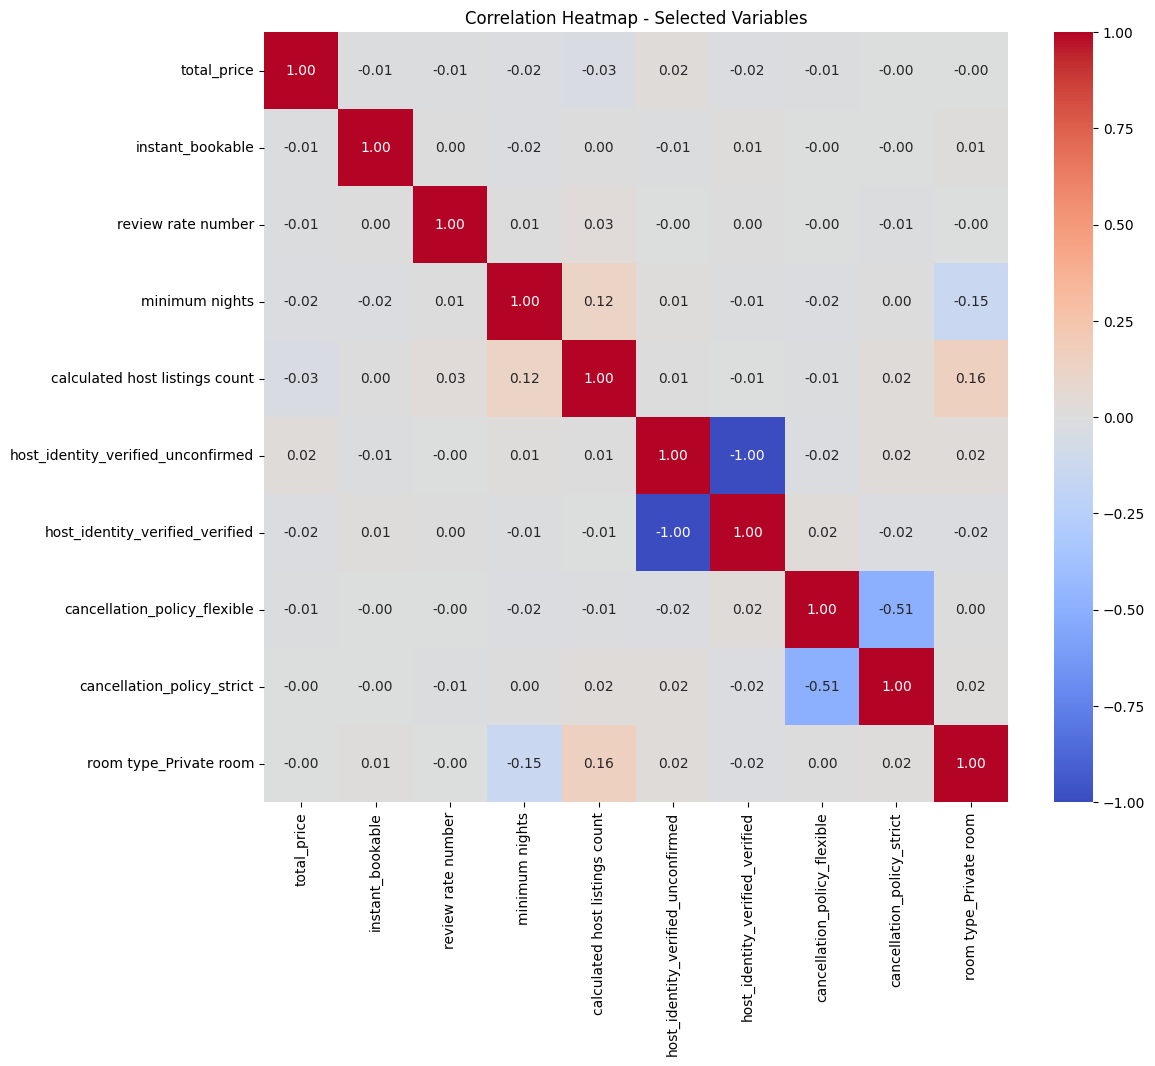

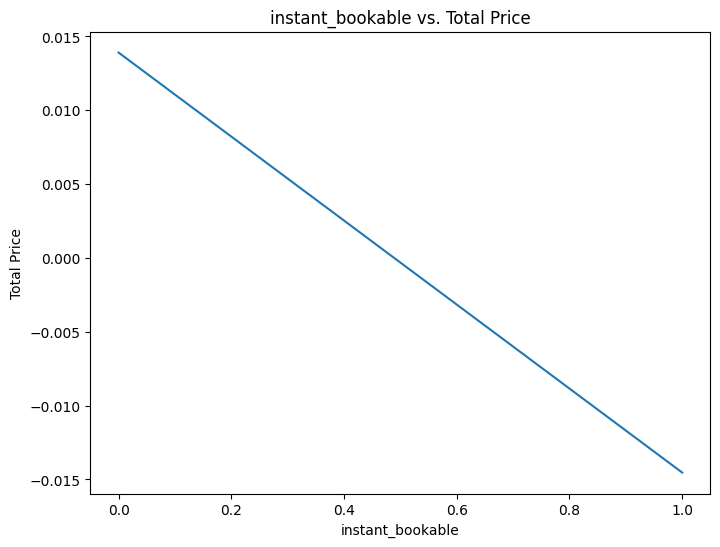

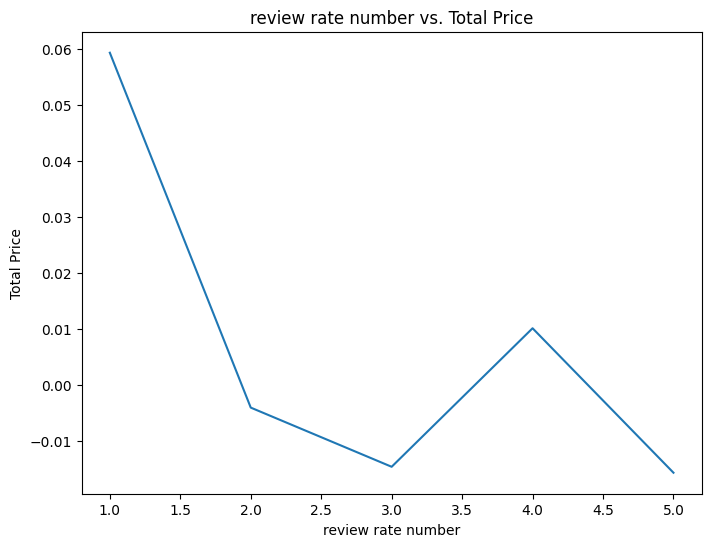

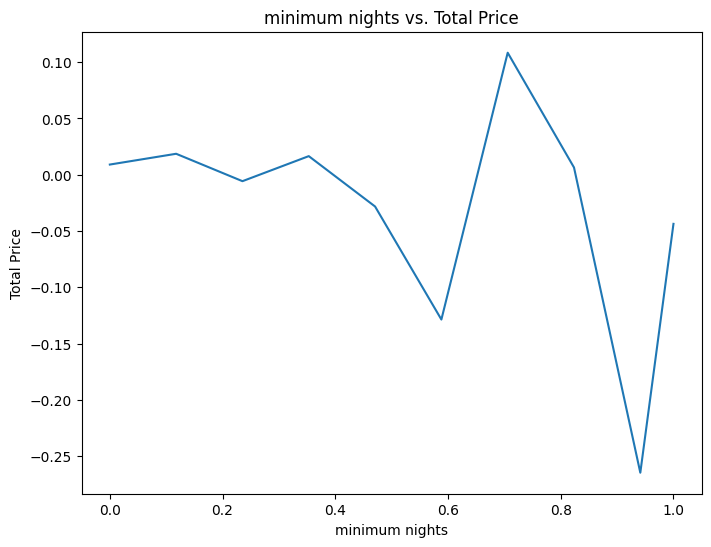

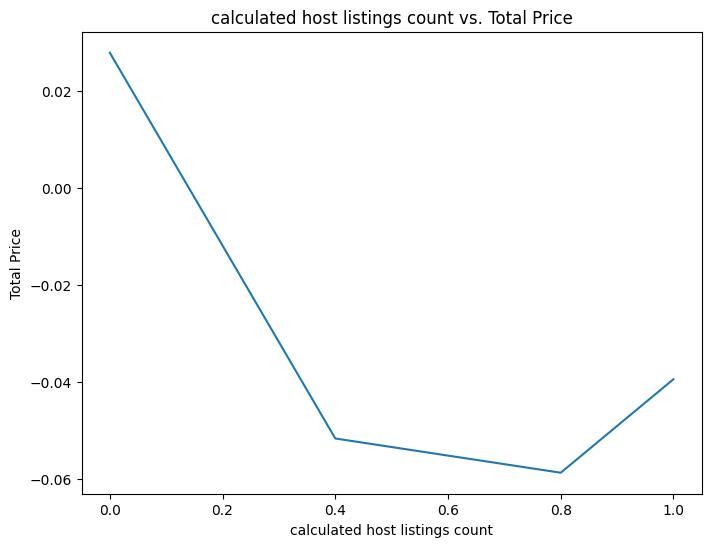

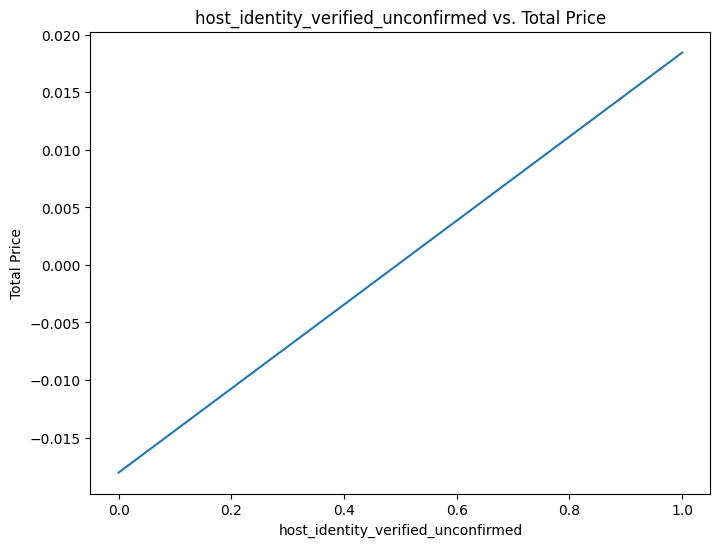

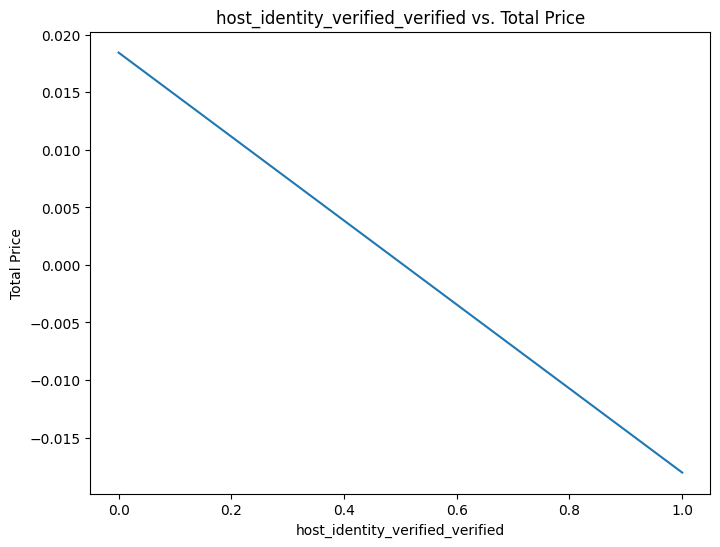

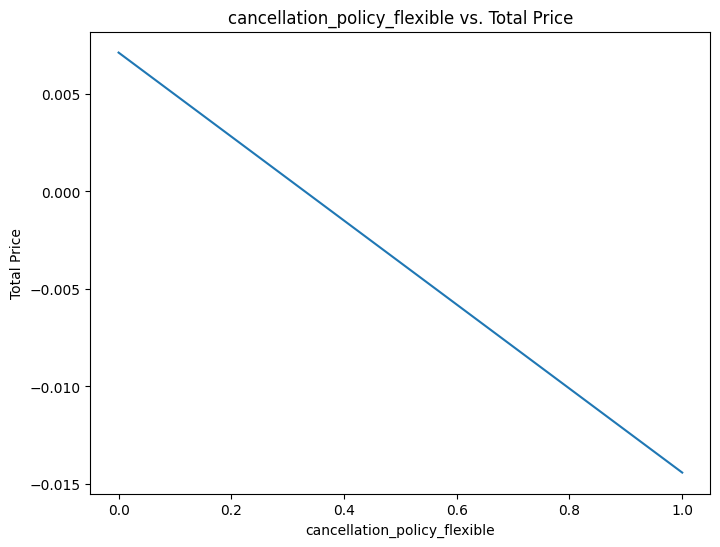

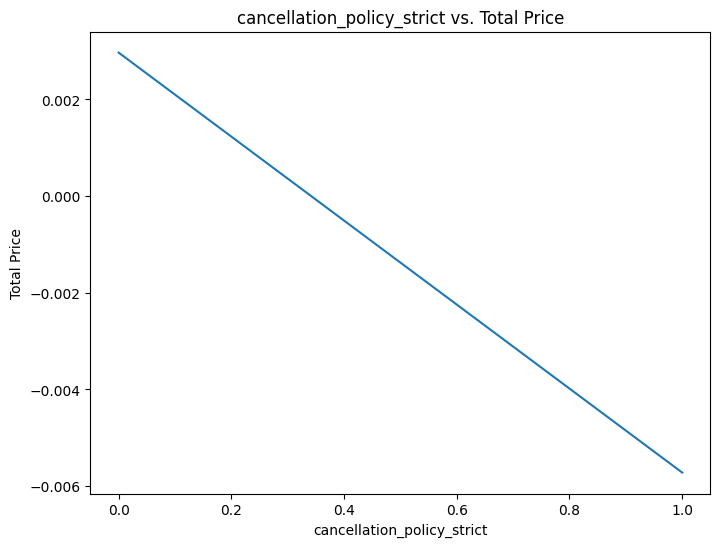

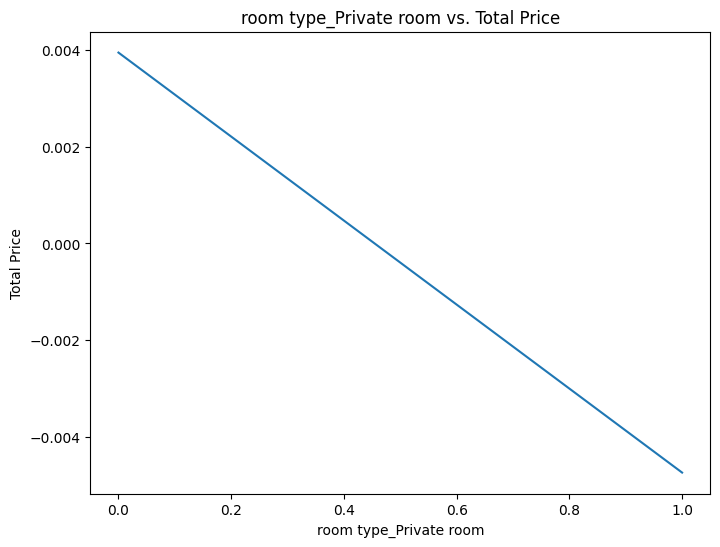

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_vars = [
    'instant_bookable',
    'review rate number',
    'minimum nights',
    'calculated host listings count',
    'host_identity_verified_unconfirmed',
    'host_identity_verified_verified',
    'cancellation_policy_flexible',
    'cancellation_policy_strict',
    'room type_Private room'
]

if selected_vars:
    selected_data = data[['total_price'] + selected_vars].copy()
    selected_data = selected_data.dropna()

    if not selected_data.empty:

        # Filter out non-numeric columns (for heatmap)
        numeric_cols = selected_data.select_dtypes(include=['number']).columns
        numeric_data = selected_data[numeric_cols]

        # Heatmap of correlations (numeric columns only)
        plt.figure(figsize=(12, 10))  # Adjust figure size as needed
        sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Heatmap - Selected Variables")
        plt.show()

        # Line graphs of each variable vs. total_price
        for var in selected_vars:
            if selected_data[var].dtype in ['int64', 'float64']:
                plt.figure(figsize=(8, 6))
                sns.lineplot(x=var, y='total_price', data=selected_data, err_style=None)
                plt.title(f"{var} vs. Total Price")
                plt.xlabel(var)
                plt.ylabel("Total Price")
                plt.show()

    else:
        print("No valid data points after handling NaN values in dataset.")

else:
    print("No relevant columns found.")

# **Machine Learning**

We're working on a regression problem, accuracy and F1-score (used for classification) are not applicable.
Instead, you should focus on regression metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² (coefficient of determination).

By breaking the data down by neighborhood (using one-hot encoding neighborhood group_),we create separate models for each neighborhood. This is a great approach because:
Why is it better?

* **Different neighborhood**s → **different patterns**

In Manhattan, the price may depend on the number of bedrooms and floors,

In the Bronx, it may depend on the availability of parking or proximity to the subway.
Separate models take these differences into account.

* **Better model quality**

If you train one model on all neighborhoods at once, it will average out the influence of features.

By making separate models for each neighborhood, you increase the accuracy (R² closer to 1).

Taking the logarithm of the target variable (total_price_log = log(1 + total_price)) helps smooth out the spread of the data and makes it more normally distributed. This is especially important for models that are sensitive to outliers and large variability, such as linear regression and Ridge

In [ ]:
data['total_price_log'] = np.log1p(data['total_price']) #total_price varies greatly

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


##Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming 'data' DataFrame is already loaded and preprocessed

# Get one-hot encoded columns related to 'neighbourhood group'
neighbourhood_group_cols = [col for col in data.columns if col.startswith('neighbourhood group_')]

# Dictionary to store results
results = {}

# Check if any one-hot encoded columns exist
if neighbourhood_group_cols:
    for col in neighbourhood_group_cols:
        neighborhood = col.replace('neighbourhood group_', '')  # Extract neighborhood name

        # Filter data for the specific neighborhood
        neighborhood_data = data[data[col] == 1].copy()

        # Define features and target
        numerical_features = neighborhood_data.select_dtypes(include=['float64']).columns.tolist()
        categorical_features = neighborhood_data.select_dtypes(include=['object']).columns.tolist()

        # Remove target variable from features
        if 'total_price' in numerical_features:
            numerical_features.remove('total_price')

        # Function to filter categorical features with more than two unique values
        def filter_categorical_features(df, categorical_features):
            return [feature for feature in categorical_features if len(df[feature].unique()) > 2]

        categorical_features = filter_categorical_features(neighborhood_data, categorical_features)

        # Create transformers
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Combine transformers
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        # Create pipeline
        pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', RandomForestRegressor(random_state=42))])

        # Split data
        X = neighborhood_data.drop(columns=['total_price'], errors='ignore')
        y = neighborhood_data['total_price']

        if X.shape[0] < 2:
            continue  # Skip if not enough data

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train and evaluate Random Forest Regression
        pipeline_rf.fit(X_train, y_train)
        y_pred_rf = pipeline_rf.predict(X_test)
        mse_rf = mean_squared_error(y_test, y_pred_rf)
        r2_rf = r2_score(y_test, y_pred_rf)

        # Store results
        results[neighborhood] = {'MSE': mse_rf, 'R²': r2_rf}

# Print results
for neighborhood, metrics in results.items():
    print(f"\nRandom Forest Regression Results for {neighborhood}:")
    print(f"MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")



Random Forest Regression Results for Bronx:
MSE: 0.0215, R²: 0.9775

Random Forest Regression Results for Brooklyn:
MSE: 0.0077, R²: 0.9917

Random Forest Regression Results for Manhattan:
MSE: 0.0172, R²: 0.9821

Random Forest Regression Results for Queens:
MSE: 0.0163, R²: 0.9852

Random Forest Regression Results for Staten Island:
MSE: 0.1764, R²: 0.7695


* Bronx, Brooklyn, Manhattan, and Queens have high R² values (above 0.97), meaning the model explains most of the variance in total price for those boroughs.

* Staten Island has a lower R² = 0,7695, which indicates the model isn't performing as well for this borough. The higher MSE = 0.1908 suggests larger prediction errors compared to other boroughs.

##Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get one-hot encoded columns related to 'neighbourhood group'
neighbourhood_group_cols = [col for col in data.columns if col.startswith('neighbourhood group_')]

# Check if any one-hot encoded columns exist
if neighbourhood_group_cols:
    results = {}

    print("Data points per neighbourhood group:")

    for col in neighbourhood_group_cols:
        group_name = col.replace('neighbourhood group_', '')

        # Filter subgroup data
        group_data = data[data[col] == 1]
        num_samples = group_data.shape[0]  # Number of data points

        print(f"{group_name}: {num_samples} data points")

        # Select numerical features (excluding target)
        numerical_group = group_data.select_dtypes(include=['float64', 'int64'])
        if 'total_price_log' not in numerical_group.columns or num_samples < 2:
            continue  # Skip if 'total_price' is missing or not enough data

        # Drop NaN values
        numerical_group = numerical_group.dropna(subset=['total_price_log'])

        # Define X (features) and y (target)
        X = numerical_group.drop(columns=['total_price_log'], errors='ignore')
        y = numerical_group['total_price_log']

        # Split into train/test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if X_train.empty or X_test.empty:
            continue  # Skip if there is no data left after splitting

        # Train linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Get model performance
        score = model.score(X_test, y_test)
        results[group_name] = score

    # Print results
    print("\nR² scores per neighbourhood group:")
    for group, r2 in results.items():
        print(f"R² for {group}: {r2:.4f}")

else:
    print("Error.Skipping regression analysis.")



Data points per neighbourhood group:
Bronx: 119 data points
Brooklyn: 2127 data points
Manhattan: 2177 data points
Queens: 666 data points
Staten Island: 40 data points

R² scores per neighbourhood group:
R² for Bronx: 0.8144
R² for Brooklyn: 0.7881
R² for Manhattan: 0.7595
R² for Queens: 0.7507
R² for Staten Island: 0.1598


We performed outlier removal on total_price_log for Staten Island using the IQR method to cap extreme values. This helped reduce the influence of extreme prices on the mode

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# only for Staten Island
staten_island_data = data[data['neighbourhood group_Staten Island'] == 1]

# calculate
Q1 = staten_island_data['total_price_log'].quantile(0.25)
Q3 = staten_island_data['total_price_log'].quantile(0.75)
IQR = Q3 - Q1

# We define the boundaries of emissions
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = staten_island_data[(staten_island_data['total_price_log'] >= lower_bound) &
                                   (staten_island_data['total_price_log'] <= upper_bound)]

# Display the number of removed emissions
num_removed = staten_island_data.shape[0] - filtered_data.shape[0]
print(f"Removed emissions: {num_removed}")


data.loc[data['neighbourhood group_Staten Island'] == 1, 'total_price_log'] = np.clip(
    staten_island_data['total_price_log'], lower_bound, upper_bound)



Removed emissions: 8


In [ ]:
import numpy as np

# Filter data for Staten Island only
staten_island_data = data[data['neighbourhood group_Staten Island'] == 1].copy()

# Compute quartiles
Q1 = staten_island_data['total_price_log'].quantile(0.25)
Q3 = staten_island_data['total_price_log'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
num_removed = staten_island_data[
    (staten_island_data['total_price_log'] < lower_bound) |
    (staten_island_data['total_price_log'] > upper_bound)
].shape[0]
print(f"Number of outliers removed: {num_removed}")

# Clip the values in the original dataset
data.loc[data['neighbourhood group_Staten Island'] == 1, 'total_price_log'] = np.clip(
    data.loc[data['neighbourhood group_Staten Island'] == 1, 'total_price_log'],
    lower_bound, upper_bound
)



Number of outliers removed: 0


The R² (coefficient of determination) value shows how well the linear regression explains the variability in the target variable (total_price) based on the input features.

For most areas (Bronx, Brooklyn, Manhattan, Queens) the model works well (R² ≈ 0.75+)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Get one-hot encoded columns related to 'neighbourhood group'
neighbourhood_group_cols = [col for col in data.columns if col.startswith('neighbourhood group_')]

# Check if any one-hot encoded columns exist
if neighbourhood_group_cols:
    results = {}

    for col in neighbourhood_group_cols:
        group_name = col.replace('neighbourhood group_', '')

        # Filter subgroup data
        group_data = data[data[col] == 1]

        # Select numerical features (excluding target)
        numerical_group = group_data.select_dtypes(include=['float64', 'int64'])
        if 'total_price_log' not in numerical_group.columns or numerical_group.shape[0] < 2:
            continue  # Skip if 'total_price_log' is missing or not enough data

        # Drop NaN values from target
        numerical_group = numerical_group.dropna(subset=['total_price_log'])

        # Define X (features) and y (target)
        X = numerical_group.drop(columns=['total_price_log'], errors='ignore').fillna(0)  # Fill NaNs
        y = numerical_group['total_price_log']

        # Split into train/test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        if X_train.empty or X_test.empty:
            continue  # Skip if there is no data left after splitting

        # Train Gradient Boosting model
        model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05, max_depth=1, random_state=42)
        model.fit(X_train, y_train)

        # Get model performance
        score = model.score(X_test, y_test)  # R-squared
        results[group_name] = score

    # Print results
    for group, r2 in results.items():
        print(f"R² for {group}: {r2:.4f}")

else:
    print("Error.Skipping regression analysis.")



R² for Bronx: 0.9280
R² for Brooklyn: 0.9273
R² for Manhattan: 0.8923
R² for Queens: 0.9014
R² for Staten Island: 0.8922


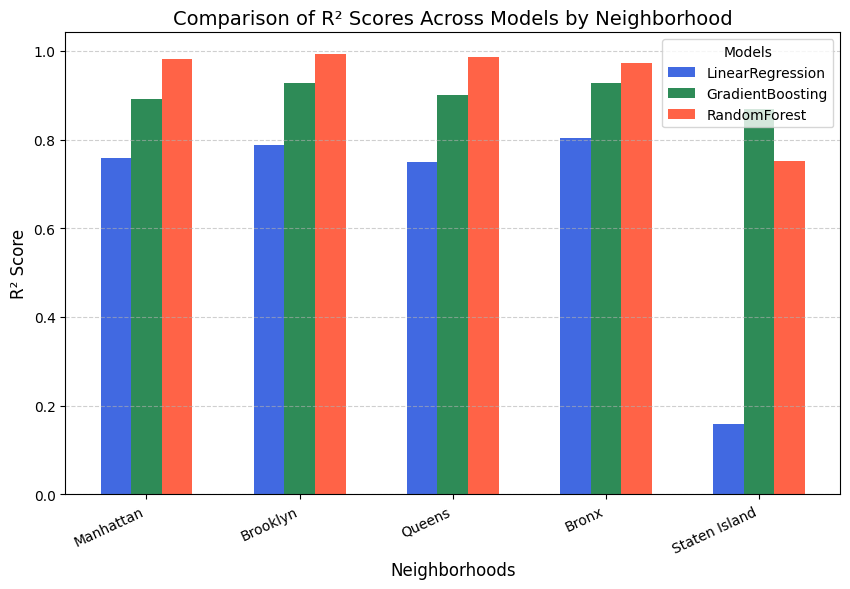

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


results = {
    'Manhattan': {'LinearRegression': 0.7594, 'GradientBoosting': 0.8923, 'RandomForest': 0.9819},
    'Brooklyn': {'LinearRegression': 0.7878, 'GradientBoosting': 0.9273, 'RandomForest': 0.9917},
    'Queens': {'LinearRegression': 0.7495, 'GradientBoosting': 0.9014, 'RandomForest': 0.9850},
    'Bronx': {'LinearRegression': 0.8045, 'GradientBoosting': 0.9280, 'RandomForest': 0.9736},
    'Staten Island': {'LinearRegression': 0.1598, 'GradientBoosting': 0.8691, 'RandomForest': 0.7507},
}

# Neighborhoods and models
neighborhoods = list(results.keys())
models = list(next(iter(results.values())).keys())

# Data for the plot
x = np.arange(len(neighborhoods))  # Neighborhood indices
width = 0.2
colors = ['royalblue', 'seagreen', 'tomato']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
for i, model in enumerate(models):
    model_scores = [results[nb][model] for nb in neighborhoods]
    ax.bar(x + i * width, model_scores, width, label=model, color=colors[i])

# Graph formatting
ax.set_xlabel('Neighborhoods', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax.set_title('Comparison of R² Scores Across Models by Neighborhood', fontsize=14)
ax.set_xticks(x + width)
ax.set_xticklabels(neighborhoods, rotation=25, ha='right')
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)


plt.show()



**Random Forest **

orks with nonlinear dependencies - if prices in Staten Island depend on factors more complex than a simple linear dependence, Random Forest will be able to capture it.

Less sensitive to outliers - single outliers do not greatly affect the decision tree, while linear regression can "break".

Handles small data better - random forest works with an ensemble of trees, which helps to better "understand" the structure even in a small amount of data.

**Gradient Boosting **

Unlike linear regression, which assumes a linear relationship, gradient boosting is better able to handle complex, nonlinear relationships, even with small amounts of data. ( For Staten Island)

##K- means


We are using K-means clustering to group Airbnb listings based on their price

The goal is to identify clusters of listings with similar prices and analyze whether this grouping provides meaningful insights

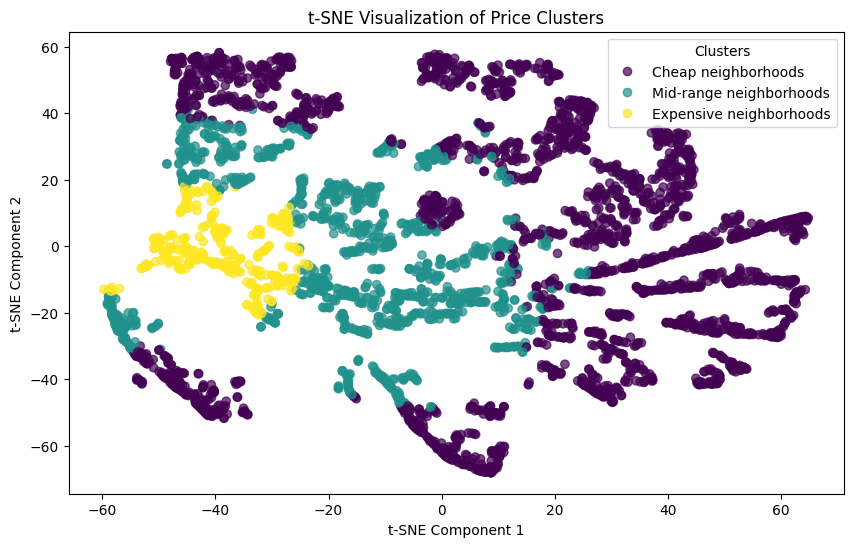

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming data is loaded (replace with your actual data loading)
# data = pd.read_csv('your_dataset.csv')

# Select the features for clustering (multiple features)
X = data[['total_price_log', 'minimum nights', 'number of reviews', 'calculated host listings count', 'reviews per month']].dropna()

# Ensure that we are using the same rows for clustering as in the original dataset
data_cleaned = data.loc[X.index]

# Train KMeans with the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_cleaned['price_cluster'] = kmeans.fit_predict(X)

# Define cluster labels
legend_labels = {
    0: "Cheap neighborhoods",
    1: "Mid-range neighborhoods",
    2: "Expensive neighborhoods"
}

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize clusters in 2D using t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data_cleaned['price_cluster'], cmap='viridis', alpha=0.7)

# Add a legend with correct cluster labels
handles, _ = scatter.legend_elements()
plt.legend(handles, [legend_labels[i] for i in range(optimal_k)], title="Clusters")

# Axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Price Clusters')

# Show the plot
plt.show()


